In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# credit card Fraud Detection
# Veri seti:
* Bu proje : kredi kartının kullaıldığı her yerde bulunan kredi kartı dolandırıcılık tespiti yapılmasını amaçlamaktadır.BAnkalarda,e-commerce(e ticaret siteleri),ve kredi kartının geçtiği her yerde karşımıza çıkabilir.
* amaç :kredi kartı dolandırıclık tespiti yaparak tahminde bulunmak ve tespit etmektir.
* sınıflandırma projesidir.machine learning kullanılacaktır.
* v1 -v29 feature değişkenleri standardlaştırlımış.
* işem yapılan yer, lokasyon,site gibi değerler bunlar gizlenmiştir.
* bizden beklenen bu v columnlarından önemli olanları bulup frauda sebep verenleri bulmaktır.

In [120]:
df=pd.read_csv("creditcard_2023.csv") #vveriyi okuma

# EDA

In [121]:
df #id column primary keydir v1-v29 columlartı gizlenmiş feature dır.yani bunlar müşteriye ait herhangi bir özelliktir.

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216530,216530,-0.822956,-2.127968,1.221063,-0.727781,1.398860,-0.583875,-0.026752,0.084368,0.714143,...,0.169469,0.112201,-0.170497,1.729952,1.056004,0.167565,-0.336209,-1.682367,20208.23,0.0
216531,216531,1.684370,-0.380514,-0.131738,-0.196618,0.639512,0.074291,0.707820,-0.215609,0.248730,...,-0.023994,0.465896,-0.040077,1.527905,0.631688,-1.343278,-0.288632,-0.244606,16475.60,0.0
216532,216532,1.742854,-0.270229,-0.417079,-0.418316,1.271088,0.471176,0.650883,-0.160398,0.531061,...,-0.108793,0.208353,-0.024545,-1.227854,0.294532,1.617754,-0.275366,-0.166473,3045.33,0.0
216533,216533,-0.133874,-0.539082,2.139674,-0.667506,0.294679,1.710447,0.291280,0.019199,-0.244970,...,-0.143944,0.108633,-0.047129,-2.610214,0.110004,-0.763125,-0.028766,0.099118,2830.28,0.0


In [122]:
# amount=ücret miktarıdır. class 1 ise sahtekarlık vardır. 0 ise yoktur demektir.

In [123]:
df.Class.value_counts()

0.0    216131
1.0       403
Name: Class, dtype: int64

In [124]:
#veri setinin %99.81  0(non fraudalent) 0.19 yani % de 1 bile değil bu da fraudalentir.

<Axes: xlabel='Class', ylabel='count'>

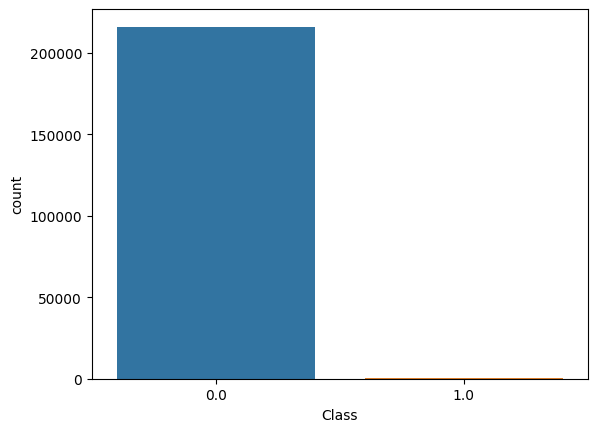

In [125]:
sns.countplot(df,x="Class") # 1 olayının 0 olayına göre az oluğu.

In [126]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,216535.000000,216535.000000,216535.000000,216535.000000,216535.000000,216535.000000,216535.000000,216535.000000,216535.000000,216535.000000,...,216534.000000,216534.000000,216534.000000,216534.000000,216534.000000,216534.000000,216534.000000,216534.000000,216534.000000,216534.000000
mean,108267.000000,0.444114,-0.492051,0.791506,-0.706670,0.305319,0.455790,0.475741,-0.141964,0.591208,...,-0.112941,-0.045103,-0.022642,0.133141,0.012389,-0.063690,-0.213125,-0.097225,12033.659403,0.001861
std,62508.414607,0.771946,0.694742,0.708417,0.670735,0.651435,0.719616,0.536008,0.243542,0.765719,...,0.292214,0.642946,0.626634,1.127163,0.811842,1.088256,0.470201,0.784448,6932.320697,0.043101
min,0.000000,-3.495584,-49.966572,-2.631176,-4.951222,-5.182978,-21.111108,-4.351839,-10.756342,-3.751919,...,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-8.226969,-10.498633,-29.510941,50.120000,0.000000
25%,54133.500000,-0.148108,-0.657317,0.281243,-1.060695,-0.008396,0.043477,0.256132,-0.194990,0.133534,...,-0.195029,-0.516548,-0.191896,-0.589448,-0.501250,-0.792616,-0.315202,-0.210897,6033.100000,0.000000
50%,108267.000000,0.177946,-0.419835,0.696846,-0.600202,0.200714,0.342307,0.433982,-0.144159,0.453425,...,-0.118429,-0.061394,-0.049529,0.131769,0.056911,-0.128025,-0.232787,-0.059113,12009.800000,0.000000
75%,162400.500000,1.018462,-0.194427,1.220752,-0.270293,0.470525,0.719805,0.629746,-0.075399,0.903989,...,-0.038640,0.387982,0.101059,0.901632,0.542719,0.575024,-0.134257,0.088468,18052.497500,0.000000
max,216534.000000,2.229046,4.361865,14.125834,3.201536,42.716891,9.704313,41.568286,5.958040,20.270062,...,8.087080,12.632511,26.190808,11.057645,14.621509,5.623285,30.339264,77.255937,24039.930000,1.000000


In [127]:
df.shape #120000 observation and 30 features

(216535, 31)

In [128]:
df.duplicated().sum() # veride aynı observationdan 1 tane bulunur

0

label feature olmadan diğer bütün featureları göste


In [129]:
def show_columns(label_column):
 df_columns=df.drop(label_column,axis="columns")
 print(df_columns.columns)
 return df_columns
show_columns("Class")

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216530,216530,-0.822956,-2.127968,1.221063,-0.727781,1.398860,-0.583875,-0.026752,0.084368,0.714143,...,1.032485,0.169469,0.112201,-0.170497,1.729952,1.056004,0.167565,-0.336209,-1.682367,20208.23
216531,216531,1.684370,-0.380514,-0.131738,-0.196618,0.639512,0.074291,0.707820,-0.215609,0.248730,...,-0.336271,-0.023994,0.465896,-0.040077,1.527905,0.631688,-1.343278,-0.288632,-0.244606,16475.60
216532,216532,1.742854,-0.270229,-0.417079,-0.418316,1.271088,0.471176,0.650883,-0.160398,0.531061,...,-0.388700,-0.108793,0.208353,-0.024545,-1.227854,0.294532,1.617754,-0.275366,-0.166473,3045.33
216533,216533,-0.133874,-0.539082,2.139674,-0.667506,0.294679,1.710447,0.291280,0.019199,-0.244970,...,-0.270775,-0.143944,0.108633,-0.047129,-2.610214,0.110004,-0.763125,-0.028766,0.099118,2830.28


In [130]:
df.isnull().sum().sum() #checking missing value

12

In [131]:
df=df.dropna()# 120000 bir veride 18 tane kayıp veriyi silebiliriz ancak modelleme yaparken modelin hassasiyetine göre bu kararı değiştirebiliriz.
df.isnull().sum().sum()

0

<ipython-input-132-8ead1d145123>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


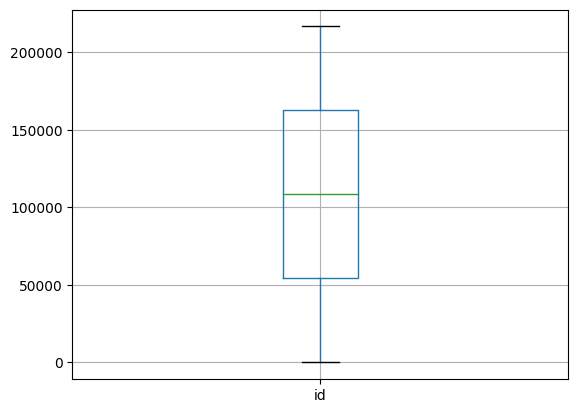

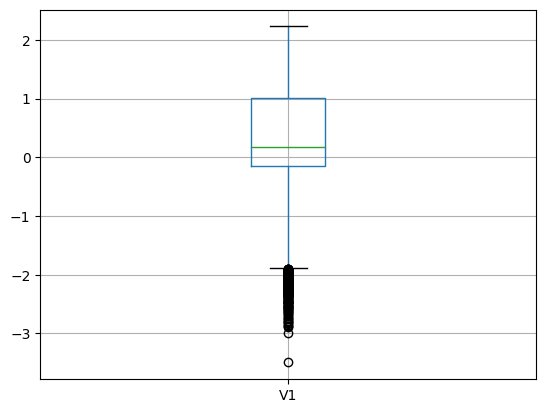

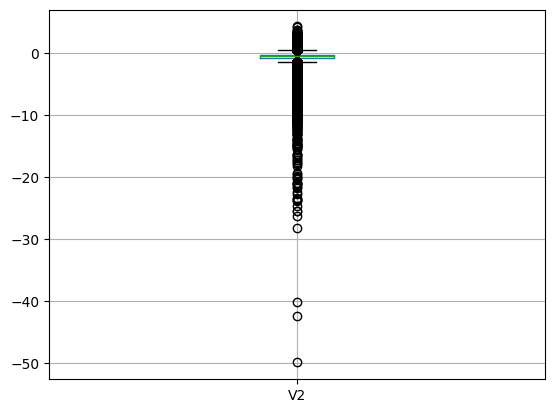

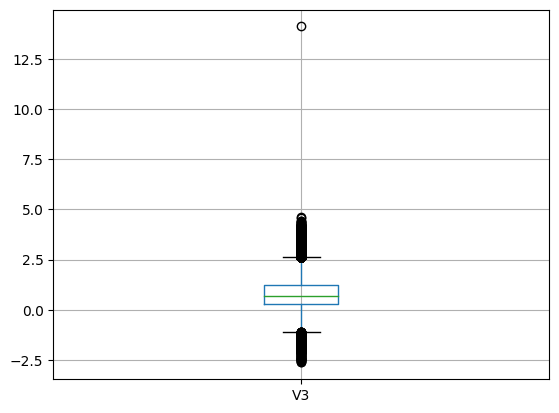

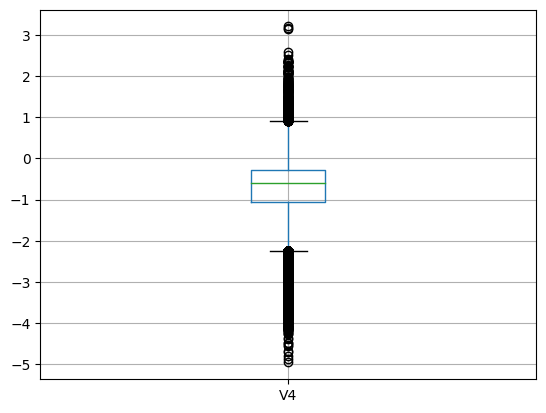

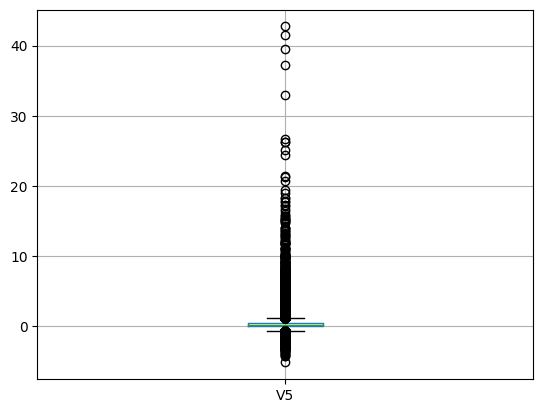

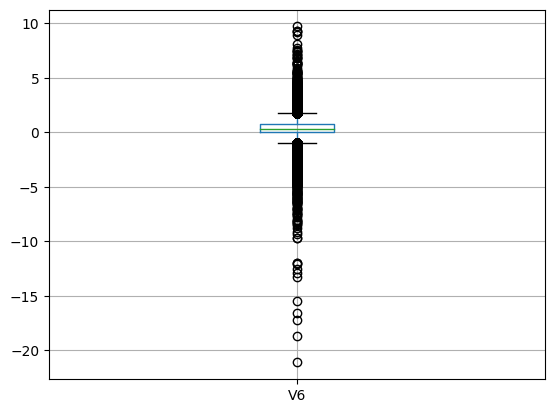

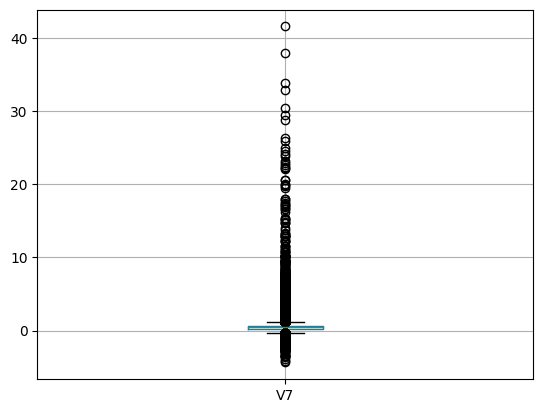

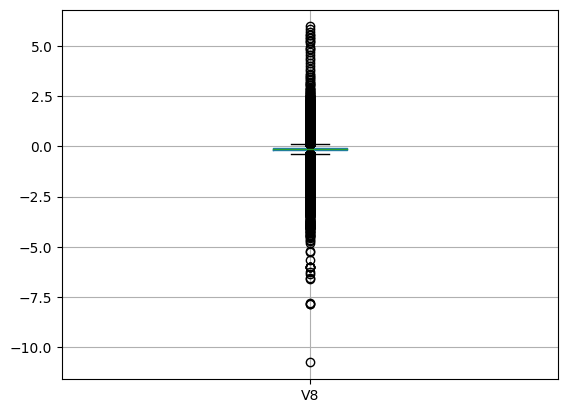

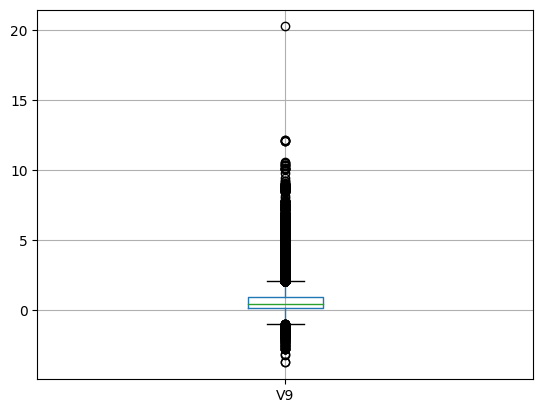

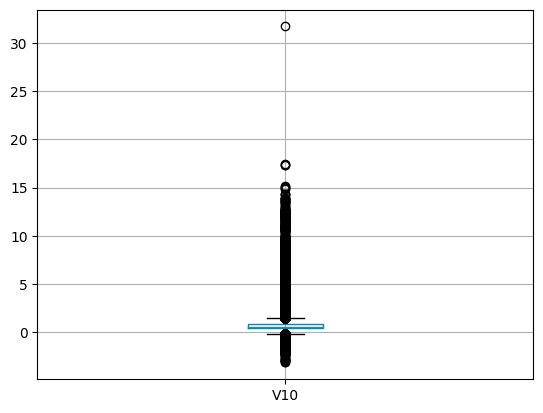

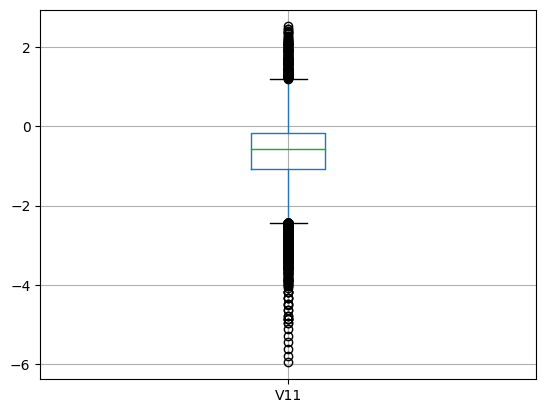

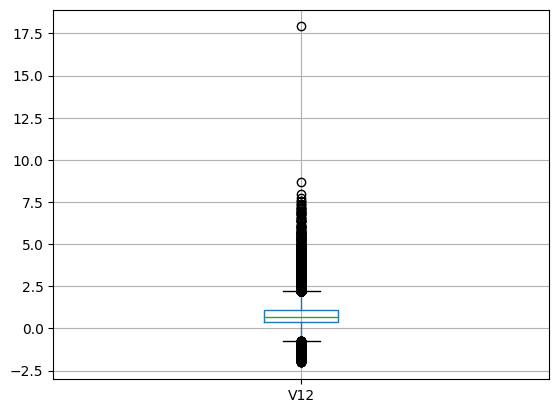

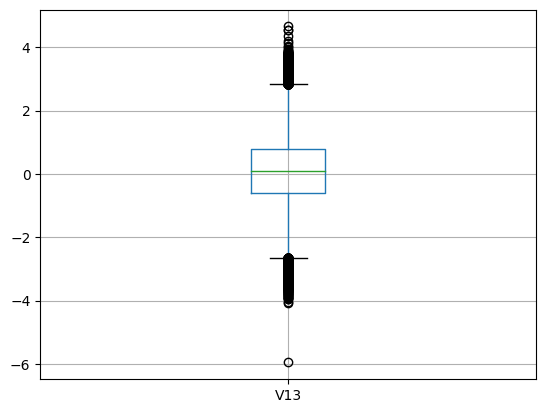

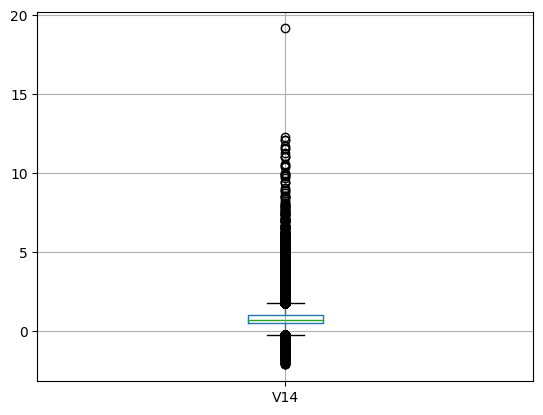

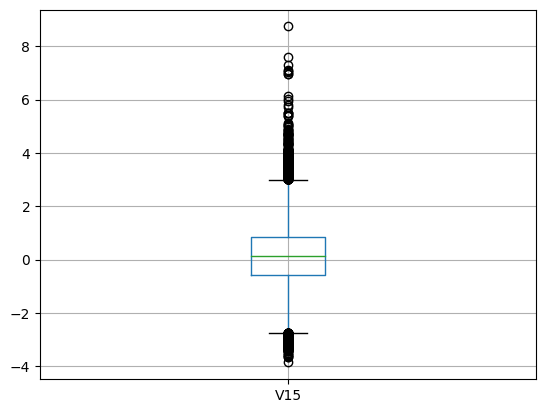

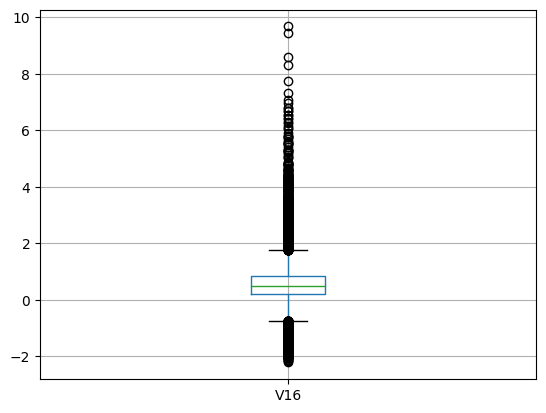

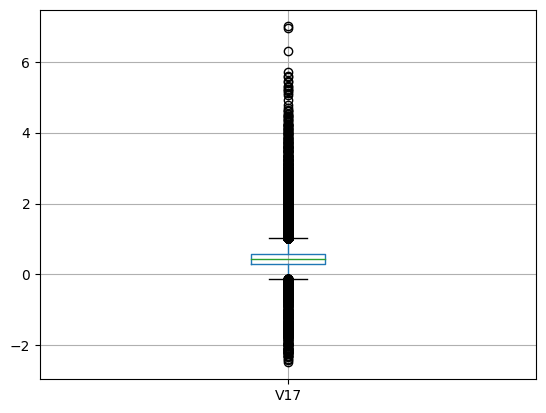

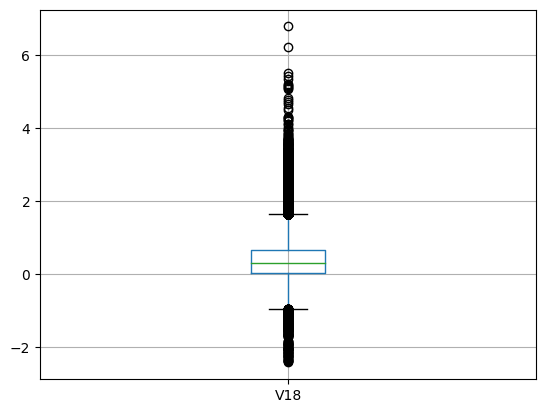

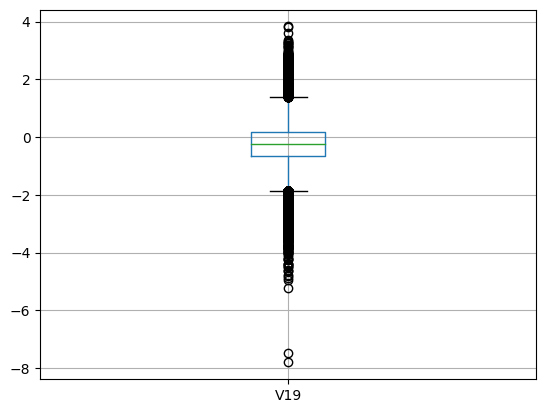

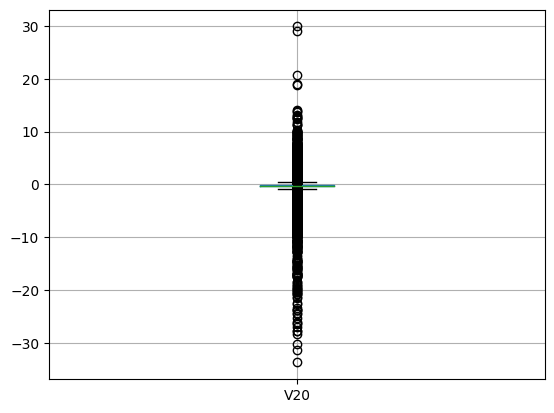

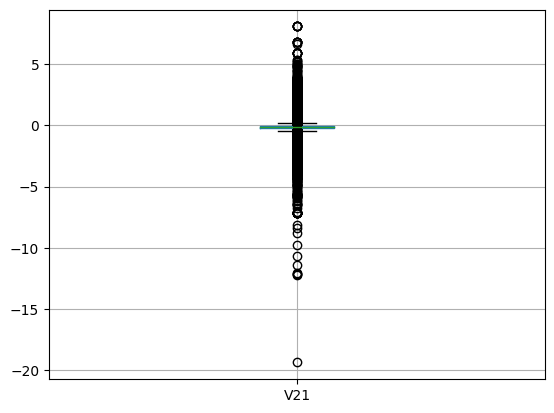

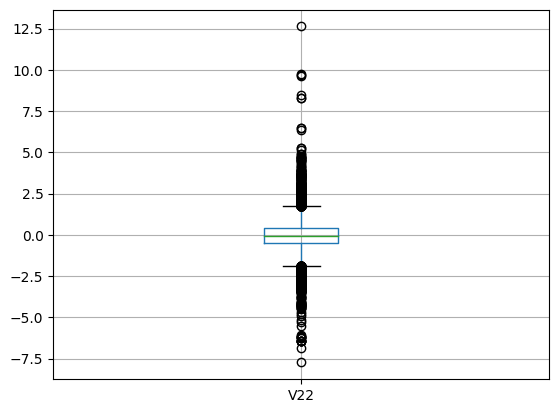

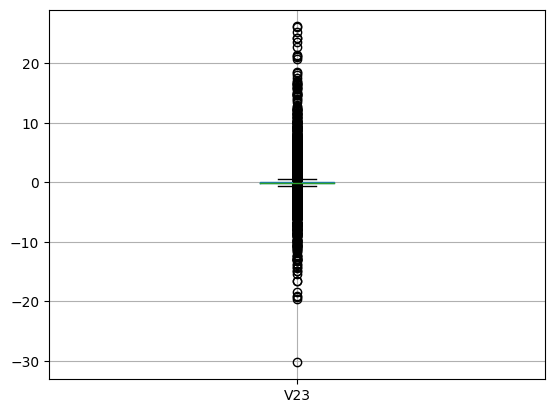

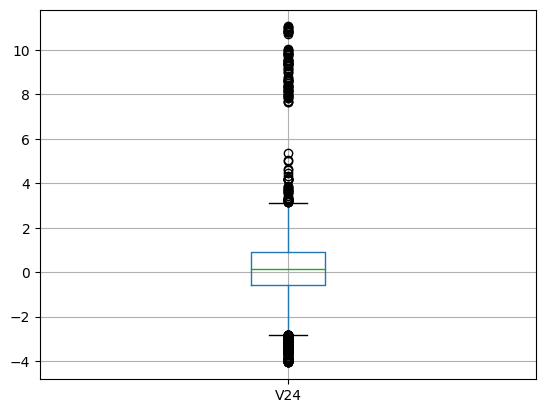

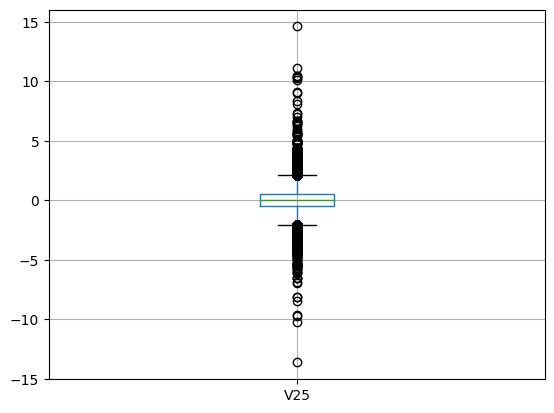

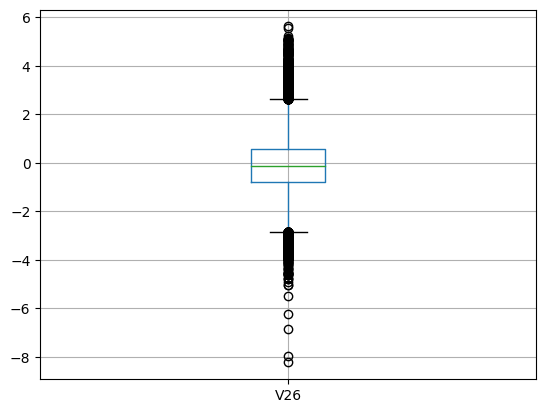

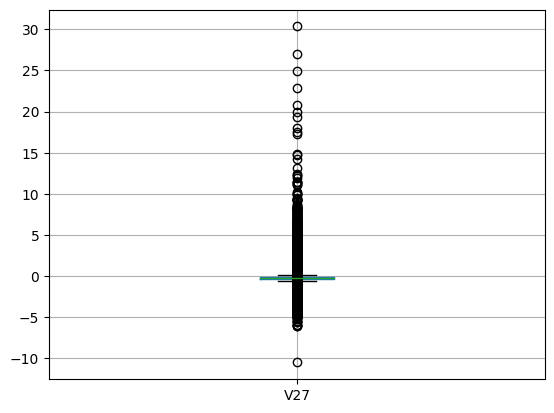

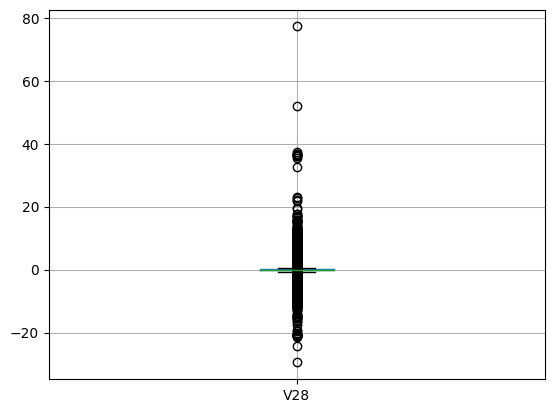

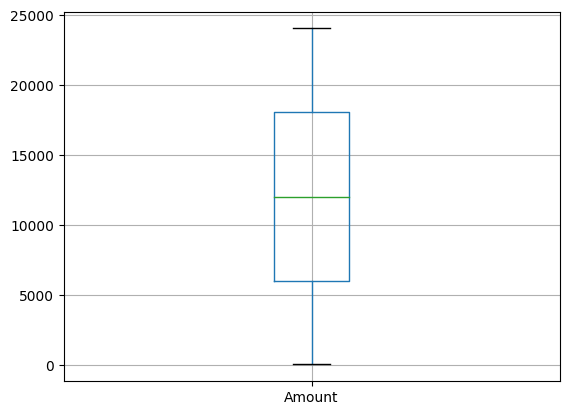

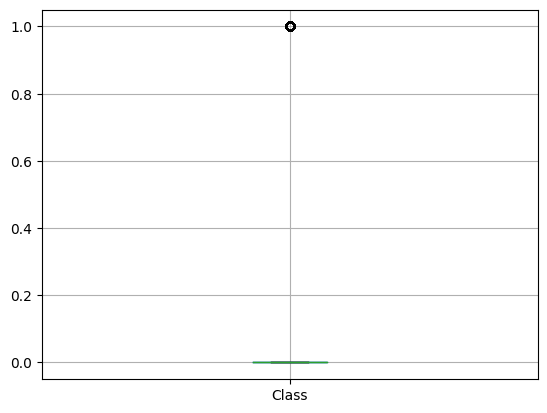

In [132]:
import matplotlib.pyplot as plt
for new in df.columns:
  plt.figure()
  df.boxplot(new)

In [ ]:
# bütün featurlarda outlier veri görünüyor.bu verileri ilk aşamada temizlemek veri setimize baktığımızda modeli yanıltabilir.

<Axes: title={'center': 'Correlation Matrix of all Features'}>

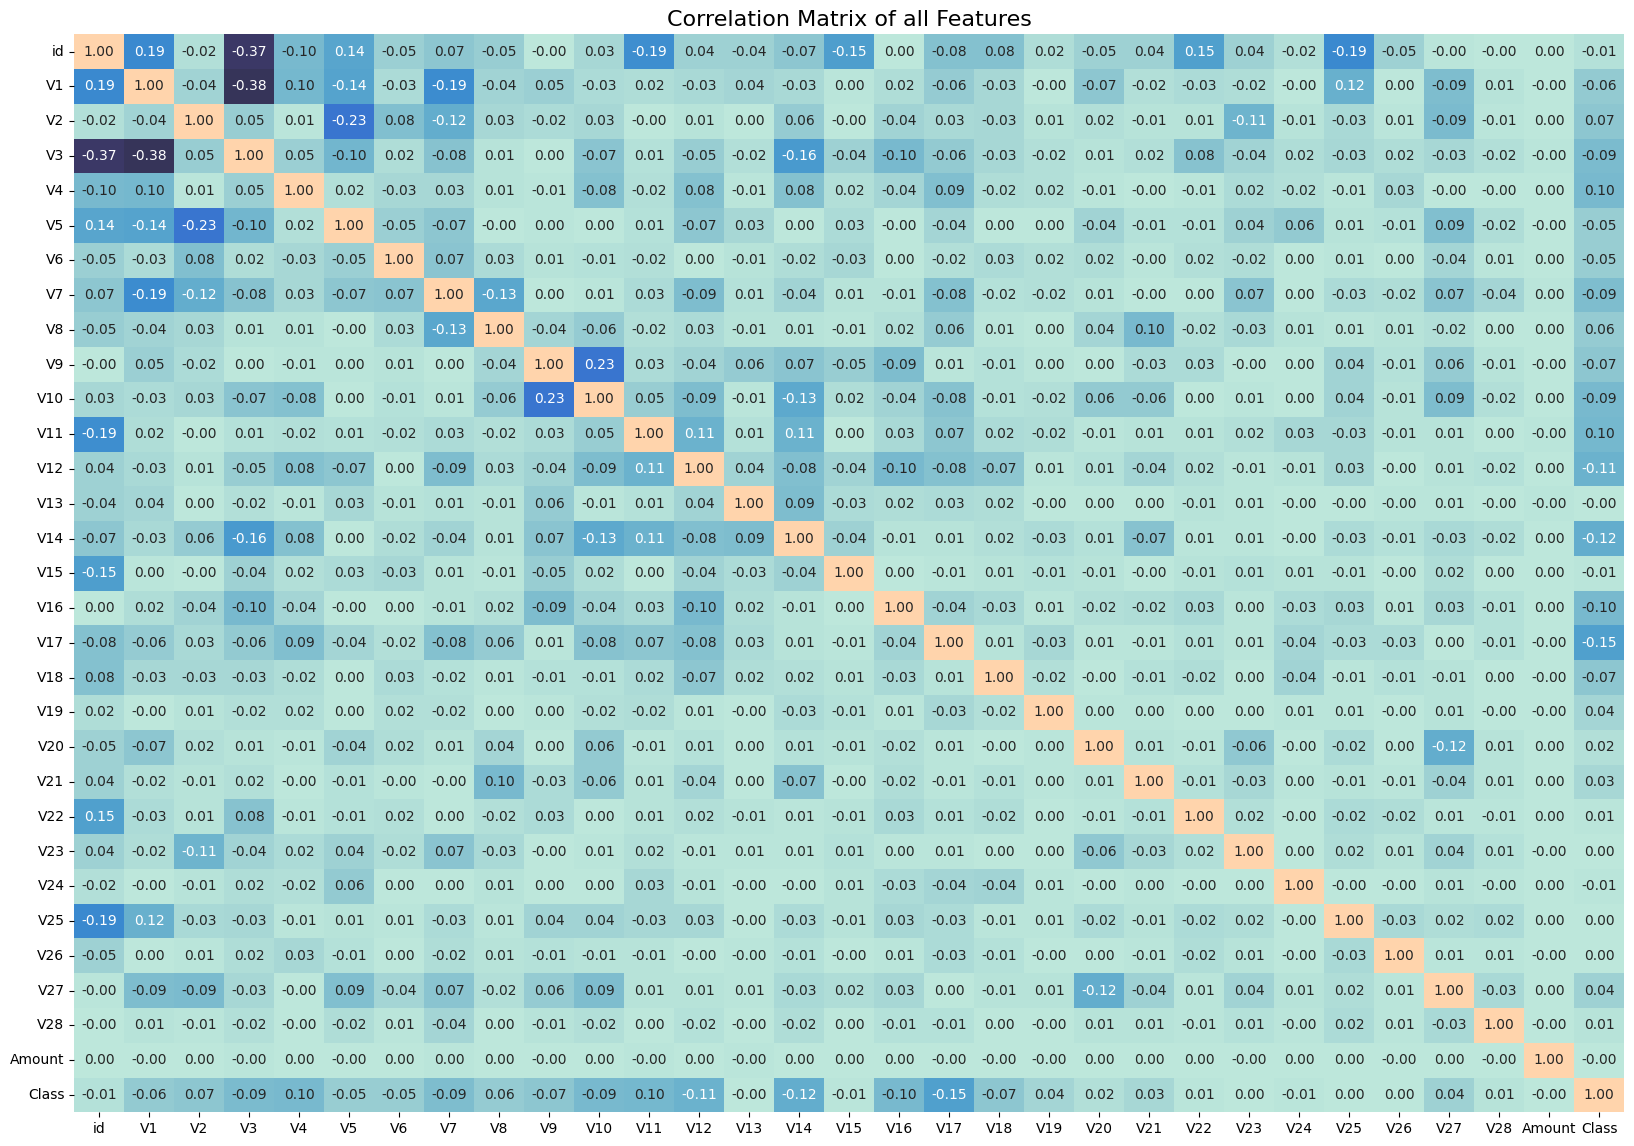

In [133]:
corr_mat = df[df.columns].corr()

fig = plt.figure(figsize=(20, 14))
plt.title('Correlation Matrix of all Features', size=16)

sns.heatmap(
    data=corr_mat.abs(),
    annot=corr_mat,
    vmin=0.0,
    center=0.5,
    vmax=1.0,
    fmt='.2f',
    cbar=None,
)

In [134]:
# V11-v13-v14  ve v1-v25 ve v27-v28 ve V10- V9  arasında poizitif korelasyon
# v14- v12  ,v13-v12 ilerde model kurarken işimize yarar.

In [156]:
df["Amount"].skew() #0.004505544168307556 .
df["Amount"].kurt()

-1.2016805369272145

# Data Preprocessing

sadece amount feature standartlaştırıyoruz

In [135]:
from sklearn.preprocessing import StandardScaler,RobustScaler
df['Amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
# df = pd.DataFrame(X_scaled, columns=df.columns) birden çok feature ı standardlaştırmak istersen.

<ipython-input-135-08f7ae921b83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1, 1))


In [135]:
df=df.drop("id",axis="columns")# önemli bir değişken olmadığını farkettik

In [31]:
# lable sınıfı hariç bütün numerik olan columnlar yazdırılır.
# bu metod column bazlı bakar eğer bütün dataframe bakmak istersek for döngüsüyle bakarız.
# outlier bu veri setinde çok fazla vardır bu veri setine göre silmek veriyi tahminlerken doğru sonuçlar vermeyebilir

In [42]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75): # bu aslında boxplot metodu ksımıdır.
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [43]:
def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False # bu veri setind outlier çok fazla olduğu için silmek modelimizi etkileyebilir.

In [49]:
for col in df.columns: # bütün columnlardaki outliers verileri anormallikleri inceler.
  print(col,check_outlier(df,df.columns))

V1 True
V2 True
V3 True
V4 True
V5 True
V6 True
V7 True
V8 True
V9 True
V10 True
V11 True
V12 True
V13 True
V14 True
V15 True
V16 True
V17 True
V18 True
V19 True
V20 True
V21 True
V22 True
V23 True
V24 True
V25 True
V26 True
V27 True
V28 True
Amount True


Bu veri kredi kartı kullanılan yerlerde işlemlerden (transactions) yola çıkarak hırsızlık olayının olup olmadığını tutar.Anormallik olmadan önce bu veriler sayseninde tespit edebiliriz